# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/DS3001/visualization`
### Do Q1 or Q2 or Q3, and Q4. You might want to refer to your work for the data wrangling assignment.

**Q1.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

**Q2.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. You should have cleaned the `Price` variable in question 2, and you'll need it later for this question.
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

In [32]:
#1. Load the `./data/airbnb_hw.csv` data with Pandas. You should have cleaned the `Price` variable in question 2, and you'll need it later for this question.
import pandas as pd 
import plotly.express as px 

In [33]:
airbnb_df = pd.read_csv('/Users/selahmitchell/Desktop/DS interactive app/plotly-dash/airbnb_hw.csv',low_memory=False)

In [34]:
#What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.

airbnb_df.head()

Host Id Host Since                                Name Neighbourhood   \
0   5162530        NaN     1 Bedroom in Prime Williamsburg       Brooklyn   
1  33134899        NaN     Sunny, Private room in Bushwick       Brooklyn   
2  39608626        NaN                Sunny Room in Harlem      Manhattan   
3       500  6/26/2008  Gorgeous 1 BR with Private Balcony      Manhattan   
4       500  6/26/2008            Trendy Times Square Loft      Manhattan   

  Property Type  Review Scores Rating (bin)        Room Type  Zipcode  Beds  \
0     Apartment                         NaN  Entire home/apt  11249.0   1.0   
1     Apartment                         NaN     Private room  11206.0   1.0   
2     Apartment                         NaN     Private room  10032.0   1.0   
3     Apartment                         NaN  Entire home/apt  10024.0   3.0   
4     Apartment                        95.0     Private room  10036.0   3.0   

   Number of Records  Number Of Reviews Price  Review Scores Rating  
0                  1                  0   145                   NaN  
1                  1                  1    37                   NaN  
2                  1                  1    28                   NaN  
3                  1                  0   199                   NaN  
4                  1                 39   549                  96.0

In [35]:
#Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
#In bed and breaksfast,Dorm, House, Hut, tents, Treehouse it more popular to rent a private room than the entire home.
pd.crosstab(df['Property Type'],df['Room Type'])

Room Type        Entire home/apt  Private room  Shared room
Property Type                                              
Apartment                  15669         10748          685
Bed & Breakfast               13           155           12
Boat                           7             1            0
Bungalow                       4             0            0
Cabin                          1             1            0
Camper/RV                      6             1            0
Castle                         0             1            0
Chalet                         0             1            0
Condominium                   72            22            0
Dorm                           4            16           11
House                        752          1258           80
Hut                            0             2            0
Lighthouse                     1             0            0
Loft                         392           312           49
Other                         14            29            4
Tent                           0             4            0
Townhouse                     83            52            1
Treehouse                      0             1            3
Villa                          4             4            0

In [36]:
#For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform 

In [37]:
fig = px.histogram(airbnb_df, x="Price")
fig.show()

In [38]:
fig = px.box(airbnb_df, y="Price")
fig.show()

In [39]:
fig = px.violin(airbnb_df, y="Price")
fig.show()

In [40]:
import numpy as np

In [48]:
airbnb_df['Price'].describe()
#There is alot of outliers as the max is 999 and the median is 125 so most of the Prices falls between 80 and 192 dollars and it is not scaled well

count    30297.000000
mean       153.357032
std        108.895698
min         10.000000
25%         80.000000
50%        125.000000
75%        192.000000
max        999.000000
Name: Price, dtype: float64

In [43]:

airbnb_df['Price_log'] = airbnb_df['Price'].notnull()

airbnb_df['Price'] = pd.to_numeric(airbnb_df['Price'], errors='coerce')

airbnb_df['Price_log'] = np.log(airbnb_df['Price'])

In [44]:
fig = px.histogram(airbnb_df, x="Price_log")
fig.show()

In [45]:
fig = px.box(airbnb_df, y="Price_log")
fig.show()

In [46]:
fig = px.violin(airbnb_df, y="Price_log")
fig.show()

Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.

In [58]:
fig = px.scatter(airbnb_df,x='Beds', y = 'Price_log')
fig.show() 
# The price does not necessarily coreelate with th amount of beds

In [64]:
df.loc[:,['Beds','Price']].groupby('Beds').describe()
# Theres is alots of 1 bed that are 100 dollars but they also vary the most. The number of one beds show that they are in higher demand. 2 bedroom also popular but the most being around $150 dollars slightly more than 1 bed room but not double the amount.  

Price                   
      count unique    top freq
Beds                          
0.0       2      2     65    1
1.0   20344    349    100  954
2.0    6610    385    150  402
3.0    2071    283    150  109
4.0     783    206    150   37
5.0     284    128    200   13
6.0     177     95    250    7
7.0      45     38    395    3
8.0      24     20    350    4
9.0      15     13    400    2
10.0     16     15     95    2
11.0      5      5    650    1
12.0      4      4    225    1
16.0     13     10  1,000    2

#Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?

In [69]:
fig = px.scatter(airbnb_df,x='Beds', y = 'Price_log', color='Room Type', symbol= 'Property Type')
fig.show() 

In [81]:

price_summary = airbnb_df.groupby(['Room Type', 'Property Type'])['Price'].describe()
print(price_summary) 


                                   count        mean         std    min  \
Room Type       Property Type                                             
Entire home/apt Apartment        15550.0  200.210161  109.967435   10.0   
                Bed & Breakfast     13.0  184.538462  119.814172   85.0   
                Boat                 7.0  158.428571   51.110524  100.0   
                Bungalow             4.0  150.750000   46.464144   87.0   
                Cabin                1.0  250.000000         NaN  250.0   
                Camper/RV            6.0  114.333333  107.685963   45.0   
                Condominium         71.0  281.126761  175.313998   80.0   
                Dorm                 4.0   44.250000   24.060687   30.0   
                House              723.0  234.554633  159.785974   27.0   
                Lighthouse           1.0   39.000000         NaN   39.0   
                Loft               379.0  284.910290  184.515517   55.0   
                Other    

In [76]:

airbnb_df.loc[:, ['Room Type', 'Price', 'Property Type']].describe(include='all')

Room Type         Price Property Type
count             30478  30297.000000         30475
unique                3           NaN            19
top     Entire home/apt           NaN     Apartment
freq              17024           NaN         27102
mean                NaN    153.357032           NaN
std                 NaN    108.895698           NaN
min                 NaN     10.000000           NaN
25%                 NaN     80.000000           NaN
50%                 NaN    125.000000           NaN
75%                 NaN    192.000000           NaN
max                 NaN    999.000000           NaN

#7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

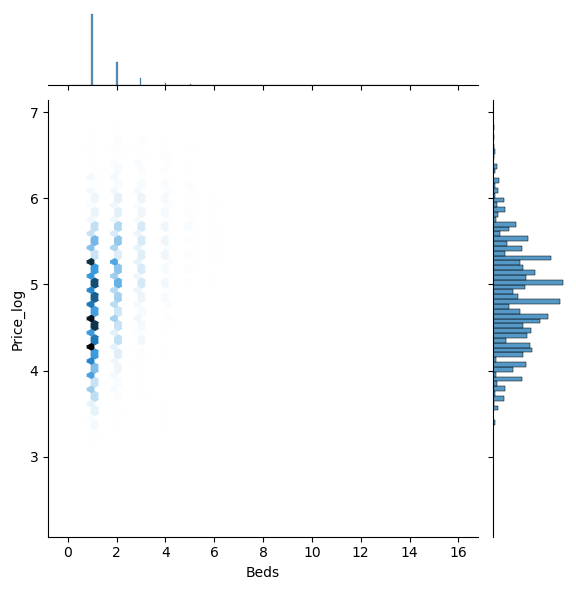

In [80]:
import seaborn as sns

sns.jointplot(airbnb_df,x='Beds',y='Price_log',kind='hex')

**Q3.** Open the `./data/CBO_data.pdf` file. This contains tax data for 2019, explaining where the money comes from that the U.S. Federal Government Spends in terms of taxation on individuals/families and payroll taxes (the amount that your employer pays in taxes on your wages).

For some context, the Federal government ultimately spent about $4.4 trillion in 2019, which was 21% of GDP (the total monetary value of all goods and services produced within the United States). Individual Income Taxes is the amount individuals pay on their wages to the Federal government, Corporate Income Taxes is the taxes individuals pay on capital gains from investment when they sell stock or other financial instruments, Payroll Taxes is the tax your employer pays on your wages, Excises and Customs Duties are taxes on goods or services like sin taxes on cigarettes or alcohol, and Estate and Gift Taxes are taxes paid on transfers of wealth to other people.

1. Get the Millions of Families and Billions of Dollars data into a .csv file and load it with Pandas.
2. Create a bar plot of individual income taxes by income decile. Explain what the graph shows. Why are some values negative?
3. Create a bar plot of Total Federal Taxes by income decile. Which deciles are paying net positive amounts, and which are paying net negative amounts?
4. Create a stacked bar plot for which Total Federal Taxes is grouped by Individual Income Taxes, Payroll Taxes, Excises and Customs Duties, and Estate and Gift Taxes. How does the share of taxes paid vary across the adjusted income deciles? (Hint: Are these the kind of data you want to melt?)
5. Below the Total line for Millions of Families and Billions of Dollars, there are data for the richest of the richest families. Plot this alongside the bars for the deciles above the Total line. Describe your results.
6. Get the Percent Distribution data into a .csv file and load it with Pandas. Create a bar graph of Total Federal Taxes by income decile.
7. A tax system is progressive if higher-income and wealthier individuals pay more than lower-income and less wealthy individuals, and it is regressive if the opposite is true. Is the U.S. tax system progressive in terms of amount paid? In terms of the percentage of the overall total?
8. Do the rich pay enough in taxes? Defend your answer.

**Q4.** Go to https://data.cms.gov/search.
1. Pick a dataset about something you are interested in. Download the data and data dictionary. If you really can't decide, you can always use this one: https://data.cms.gov/medicare-current-beneficiary-survey-mcbs/medicare-current-beneficiary-survey-data
3. Does the data dictionary document how missings are handled? For categorical variables, does it describe the possible values and missing value codes? For the numeric variables, does it describe how missing values are handled? Summarize your opinion of the data dictionary.
4. Pick out a few interesting variables, and explain why you find them jointly interesting. Clean those variables, documenting your choices by commenting in the code or in a markdown chunk in a notebook.
5. For the variables you select, make a boxplot for each numeric variable and a bar graph for each categorical variable. Do you see any outliers?
6. Create a histogram or kernel density plot, and explain what you see. Do the results require any transformations to rescale them? 
7. Create a scatter plot, and describe the relationship you see.
8. Create a table (cross tabulation, variance-covariance, or a `.describe()` five-number summary), and explain what you see.